# Project: Train a Quadcopter How to Fly

Design an agent to fly a quadcopter, and then train it using a reinforcement learning algorithm of your choice! 

Try to apply the techniques you have learnt, but also feel free to come up with innovative ideas and test them.

## Instructions

Take a look at the files in the directory to better understand the structure of the project. 

- `task.py`: Define your task (environment) in this file.
- `agents/`: Folder containing reinforcement learning agents.
    - `policy_search.py`: A sample agent has been provided here.
    - `agent.py`: Develop your agent here.
- `physics_sim.py`: This file contains the simulator for the quadcopter.  **DO NOT MODIFY THIS FILE**.

For this project, you will define your own task in `task.py`.  Although we have provided a example task to get you started, you are encouraged to change it.  Later in this notebook, you will learn more about how to amend this file.

You will also design a reinforcement learning agent in `agent.py` to complete your chosen task.  

You are welcome to create any additional files to help you to organize your code.  For instance, you may find it useful to define a `model.py` file defining any needed neural network architectures.

## Controlling the Quadcopter

We provide a sample agent in the code cell below to show you how to use the sim to control the quadcopter.  This agent is even simpler than the sample agent that you'll examine (in `agents/policy_search.py`) later in this notebook!

The agent controls the quadcopter by setting the revolutions per second on each of its four rotors.  The provided agent in the `Basic_Agent` class below always selects a random action for each of the four rotors.  These four speeds are returned by the `act` method as a list of four floating-point numbers.  

For this project, the agent that you will implement in `agents/agent.py` will have a far more intelligent method for selecting actions!

In [1]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}
// To disable scroll output in the notebook.

<IPython.core.display.Javascript object>

In [2]:
import random

class Basic_Agent():
    def __init__(self, task):
        self.task = task
    
    def act(self):
        new_thrust = random.gauss(450., 25.)
        return [new_thrust + random.gauss(0., 1.) for x in range(4)]

Run the code cell below to have the agent select actions to control the quadcopter.  

Feel free to change the provided values of `runtime`, `init_pose`, `init_velocities`, and `init_angle_velocities` below to change the starting conditions of the quadcopter.

The `labels` list below annotates statistics that are saved while running the simulation.  All of this information is saved in a text file `data.txt` and stored in the dictionary `results`.  

In [3]:
%load_ext autoreload
%autoreload 2

import csv
import numpy as np
from task import Task

# Modify the values below to give the quadcopter a different starting position.
runtime = 100.                                     # time limit of the episode
init_pose = np.array([0., 0., 10., 0., 0., 0.])  # initial pose
init_velocities = np.array([0., 0., 0.])         # initial velocities
init_angle_velocities = np.array([0., 0., 0.])   # initial angle velocities
file_output = 'data.txt'                         # file name for saved results

# Setup
task = Task(init_pose, init_velocities, init_angle_velocities, runtime)
agent = Basic_Agent(task)
done = False
labels = ['time', 'x', 'y', 'z', 'phi', 'theta', 'psi', 'x_velocity',
          'y_velocity', 'z_velocity', 'phi_velocity', 'theta_velocity',
          'psi_velocity', 'rotor_speed1', 'rotor_speed2', 'rotor_speed3', 'rotor_speed4']
results = {x : [] for x in labels}

# Run the simulation, and save the results.
with open(file_output, 'w') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(labels)
    while True:
        rotor_speeds = agent.act()
        _, _, done = task.step(rotor_speeds)
        to_write = [task.sim.time] + list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v) + list(rotor_speeds)
        for ii in range(len(labels)):
            results[labels[ii]].append(to_write[ii])
        writer.writerow(to_write)
        if done:
            break

Run the code cell below to visualize how the position of the quadcopter evolved during the simulation.

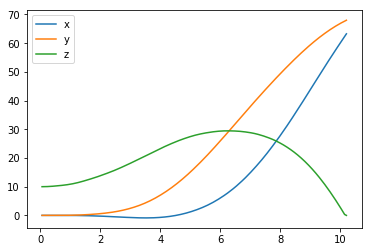

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.plot(results['time'], results['x'], label='x')
plt.plot(results['time'], results['y'], label='y')
plt.plot(results['time'], results['z'], label='z')
plt.legend()
_ = plt.ylim()

The next code cell visualizes the velocity of the quadcopter.

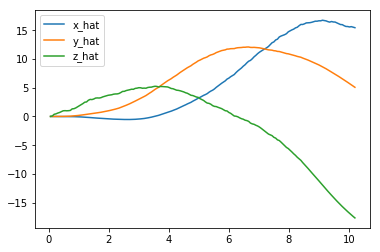

In [5]:
plt.plot(results['time'], results['x_velocity'], label='x_hat')
plt.plot(results['time'], results['y_velocity'], label='y_hat')
plt.plot(results['time'], results['z_velocity'], label='z_hat')
plt.legend()
_ = plt.ylim()

Next, you can plot the Euler angles (the rotation of the quadcopter over the $x$-, $y$-, and $z$-axes),

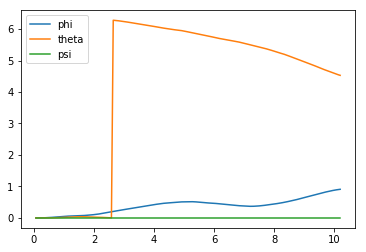

In [6]:
plt.plot(results['time'], results['phi'], label='phi')
plt.plot(results['time'], results['theta'], label='theta')
plt.plot(results['time'], results['psi'], label='psi')
plt.legend()
_ = plt.ylim()

before plotting the velocities (in radians per second) corresponding to each of the Euler angles.

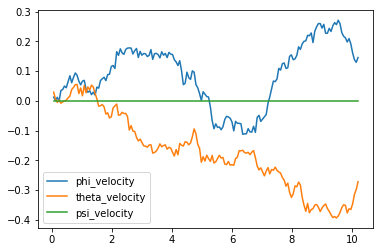

In [7]:
plt.plot(results['time'], results['phi_velocity'], label='phi_velocity')
plt.plot(results['time'], results['theta_velocity'], label='theta_velocity')
plt.plot(results['time'], results['psi_velocity'], label='psi_velocity')
plt.legend()
_ = plt.ylim()

Finally, you can use the code cell below to print the agent's choice of actions.  

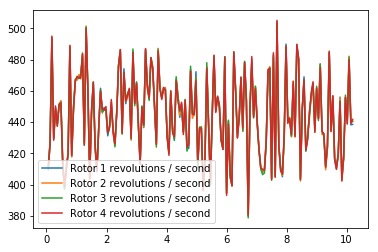

In [8]:
plt.plot(results['time'], results['rotor_speed1'], label='Rotor 1 revolutions / second')
plt.plot(results['time'], results['rotor_speed2'], label='Rotor 2 revolutions / second')
plt.plot(results['time'], results['rotor_speed3'], label='Rotor 3 revolutions / second')
plt.plot(results['time'], results['rotor_speed4'], label='Rotor 4 revolutions / second')
plt.legend()
_ = plt.ylim()

When specifying a task, you will derive the environment state from the simulator.  Run the code cell below to print the values of the following variables at the end of the simulation:
- `task.sim.pose` (the position of the quadcopter in ($x,y,z$) dimensions and the Euler angles),
- `task.sim.v` (the velocity of the quadcopter in ($x,y,z$) dimensions), and
- `task.sim.angular_v` (radians/second for each of the three Euler angles).

In [9]:
# the pose, velocity, and angular velocity of the quadcopter at the end of the episode
print(task.sim.pose)
print(task.sim.v)
print(task.sim.angular_v)

[63.25932978 67.991857    0.          0.90924924  4.53017313  0.        ]
[ 15.46550562   5.08315829 -17.66806197]
[ 0.14554587 -0.27177157  0.        ]


In the sample task in `task.py`, we use the 6-dimensional pose of the quadcopter to construct the state of the environment at each timestep.  However, when amending the task for your purposes, you are welcome to expand the size of the state vector by including the velocity information.  You can use any combination of the pose, velocity, and angular velocity - feel free to tinker here, and construct the state to suit your task.

## The Task

A sample task has been provided for you in `task.py`.  Open this file in a new window now. 

The `__init__()` method is used to initialize several variables that are needed to specify the task.  
- The simulator is initialized as an instance of the `PhysicsSim` class (from `physics_sim.py`).  
- Inspired by the methodology in the original DDPG paper, we make use of action repeats.  For each timestep of the agent, we step the simulation `action_repeats` timesteps.  If you are not familiar with action repeats, please read the **Results** section in [the DDPG paper](https://arxiv.org/abs/1509.02971).
- We set the number of elements in the state vector.  For the sample task, we only work with the 6-dimensional pose information.  To set the size of the state (`state_size`), we must take action repeats into account.  
- The environment will always have a 4-dimensional action space, with one entry for each rotor (`action_size=4`). You can set the minimum (`action_low`) and maximum (`action_high`) values of each entry here.
- The sample task in this provided file is for the agent to reach a target position.  We specify that target position as a variable.

The `reset()` method resets the simulator.  The agent should call this method every time the episode ends.  You can see an example of this in the code cell below.

The `step()` method is perhaps the most important.  It accepts the agent's choice of action `rotor_speeds`, which is used to prepare the next state to pass on to the agent.  Then, the reward is computed from `get_reward()`.  The episode is considered done if the time limit has been exceeded, or the quadcopter has travelled outside of the bounds of the simulation.

In the next section, you will learn how to test the performance of an agent on this task.

## The Agent

The sample agent given in `agents/policy_search.py` uses a very simplistic linear policy to directly compute the action vector as a dot product of the state vector and a matrix of weights. Then, it randomly perturbs the parameters by adding some Gaussian noise, to produce a different policy. Based on the average reward obtained in each episode (`score`), it keeps track of the best set of parameters found so far, how the score is changing, and accordingly tweaks a scaling factor to widen or tighten the noise.

Run the code cell below to see how the agent performs on the sample task.

In [10]:
import sys
import pandas as pd
from agents.policy_search import PolicySearch_Agent
from task import Task

num_episodes = 1000
target_pos = np.array([0., 0., 10.])
task = Task(target_pos=target_pos)
agent = PolicySearch_Agent(task) 

for i_episode in range(1, num_episodes+1):
    state = agent.reset_episode() # start a new episode
    while True:
        action = agent.act(state) 
        next_state, reward, done = task.step(action)
        agent.step(reward, done)
        state = next_state
        if done:
            print("\rEpisode = {:4d}, score = {:7.3f} (best = {:7.3f}), noise_scale = {}".format(
                i_episode, agent.score, agent.best_score, agent.noise_scale), end="")  # [debug]
            break
    sys.stdout.flush()

Episode = 1000, score =  -0.219 (best =  -0.219), noise_scale = 1.65

This agent should perform very poorly on this task.  And that's where you come in!

## Define the Task, Design the Agent, and Train Your Agent!

Amend `task.py` to specify a task of your choosing.  If you're unsure what kind of task to specify, you may like to teach your quadcopter to takeoff, hover in place, land softly, or reach a target pose.  

After specifying your task, use the sample agent in `agents/policy_search.py` as a template to define your own agent in `agents/agent.py`.  You can borrow whatever you need from the sample agent, including ideas on how you might modularize your code (using helper methods like `act()`, `learn()`, `reset_episode()`, etc.).

Note that it is **highly unlikely** that the first agent and task that you specify will learn well.  You will likely have to tweak various hyperparameters and the reward function for your task until you arrive at reasonably good behavior.

As you develop your agent, it's important to keep an eye on how it's performing. Use the code above as inspiration to build in a mechanism to log/save the total rewards obtained in each episode to file.  If the episode rewards are gradually increasing, this is an indication that your agent is learning.

In [1]:
# Imports
import sys
import numpy as np
from agents.agent import DDPG
from new_task import Task
import matplotlib as mpl
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd

# Modify the values below to give the quadcopter a different starting position.
runtime = 5                                 # Time limit of the episode.
init_pose = np.array([0., 0., 100., 0., 0., 0.])  # Initial position of the quadcopter.
init_velocities = np.array([0., 0., 1.])        # Initial velocity of the quadcopter.
init_angle_velocities = np.array([0., 0., 0.])  # Initial angular velocities of the quadcopter.
target_pos = np.array([0., 0., 200.])             # Target position to reach.

# Labels for taking logs.
labels = ['episode', 'time', 'x', 'y', 'z', 'phi', 'theta', 'psi',
          'x_velocity', 'y_velocity', 'z_velocity', 'phi_velocity', 
          'theta_velocity', 'psi_velocity', 'rotor_speed1', 'rotor_speed2', 
          'rotor_speed3', 'rotor_speed4', 'rewards', 'score', 'max_score', 'max_avg_score']

# Setup:
# Creating a Task object with the specified target position.
task = Task(init_pose, init_velocities, init_angle_velocities, runtime, target_pos)
# Creating an instance of the agent.
agent = DDPG(task)
# Specifying the number of episodes
num_episodes = 1000
# List for maintaining the score of each episode. 
scores = []
# Max average score (over 100 episodes).
max_avg_score = -np.inf
# Max score achieved during training.
max_score = -np.inf
# Dictionary for taking logs.
logs = {}



for i_episode in range(1, num_episodes+1):
    # Initialize episode.
    state = agent.reset_episode() # Start a new episode.
    total_reward = 0
    results = {x : [] for x in labels} # For storing result after each episode.
    
    while True:
        results['time'].append(task.sim.time)
        # Take action, evaluate reward and next state, update policy function.
        action = agent.act(state)
        next_state, reward, done = task.step(action)
        results['rewards'].append(reward)
        agent.step(action, reward, next_state, done)
        total_reward += reward
        
        
        # Storing the value of quadcopter's variables(position, velocity, angular velocity) after each timestep in "results".
        quadcopter_state = list(task.sim.pose) + list(task.sim.v) + list(task.sim.angular_v)
        for i, s in enumerate(quadcopter_state):
            results[labels[i+2]].append(s)
        for a in range(len(action)):
            results[labels[14+a]].append(action[a])

        
        state = next_state
        if done:
            max_score = max(total_reward, max_score)
            print("\rEpisode = {:4d}, score = {:7.3f} (max_score = {:7.3f}, max_avg_score = {:7.3f}), last_position = ({:5.1f},{:5.1f},{:5.1f}))"
                  .format(i_episode, total_reward, max_score, max_avg_score, task.sim.pose[0], task.sim.pose[1], task.sim.pose[2]), end="")
            
            # Storing result after each episode.
            results['episode'] = i_episode
            results['score'] = total_reward
            results['max_score'] = max_score
            results['max_avg_score'] = max_avg_score
            # Maintaining logs of each episode's result.
            logs[i_episode] = results
            break
    sys.stdout.flush()
    
    # Save final score
    scores.append(total_reward)

    # Update maximum average score attained over 100 consecutive trials.
    if len(scores) > 100:
        avg_score = np.mean(scores[-100:])
        max_avg_score = max(avg_score, max_avg_score)

Using TensorFlow backend.


Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Use tf.cast instead.
Episode = 1000, score =  -2.528 (max_score =   7.334, max_avg_score =  -1.797), last_position = (-23.6, -0.7,  0.0))))

## Plot the Rewards

Once you are satisfied with your performance, plot the episode rewards, either from a single run, or averaged over multiple runs. 

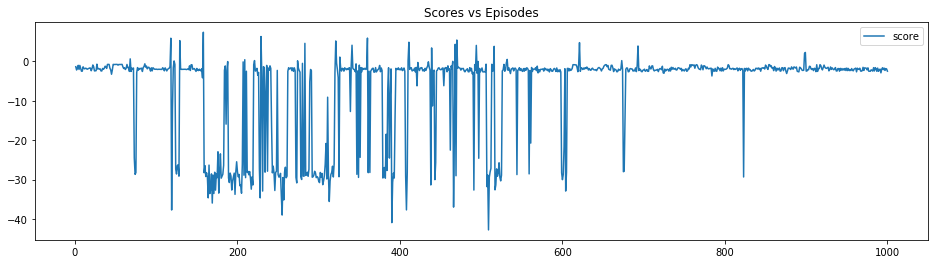

In [10]:
# Making a dataframe from the logs and saving it into a .csv file.
logs = pd.DataFrame.from_dict(data=logs, orient='index')
logs.to_csv('logs',index=False)

# Plotting the scores vs episode graph.
plt.figure(figsize=(16,4))
plt.plot(logs['episode'], logs['score'])
plt.title("Scores vs Episodes")
plt.legend()

In [3]:
# Finding the episode in which the agent achieves the maximum score.
max_score_episode = np.argmax(logs["score"])
logs.iloc[max_score_episode-1]

/Users/apoorvmalik/anaconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:56: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.
  return getattr(obj, method)(*args, **kwds)


episode                                                         158
time              [0.0, 0.06, 0.12000000000000001, 0.18, 0.23999...
x                 [-9.358978668761702e-08, -4.638661665535814e-0...
y                 [6.15695342550245e-08, 2.985637871597932e-06, ...
z                 [100.12980340831375, 100.39792505056877, 100.8...
phi               [1.852495063037196e-05, 9.85122407337613e-05, ...
theta             [2.775898981344227e-05, 0.00019052568614874588...
psi               [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
x_velocity        [-9.155845053166685e-06, -0.000194443652048948...
y_velocity        [6.065807478518335e-06, 0.00011986005414328889...
z_velocity        [3.323123852474708, 5.606059212249511, 7.81931...
phi_velocity      [0.0009193056475225994, 0.0021482942491021645,...
theta_velocity    [0.0013724030051950242, 0.005267472938224063, ...
psi_velocity      [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...
rotor_speed1      [900.0460344013128, 899.990166

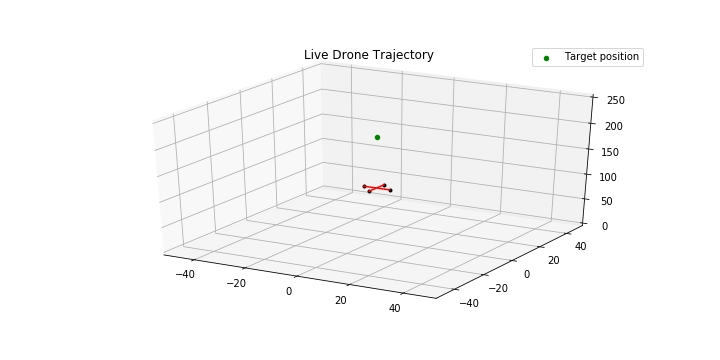

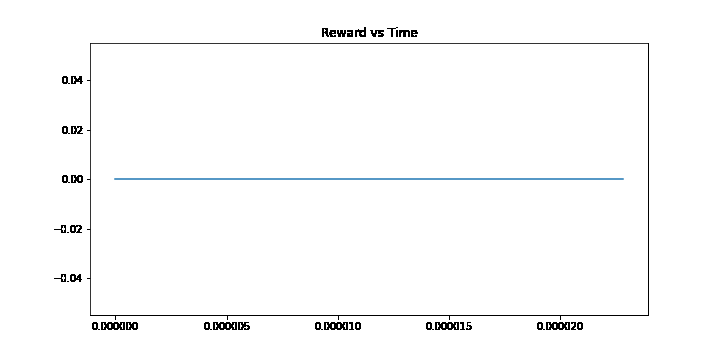

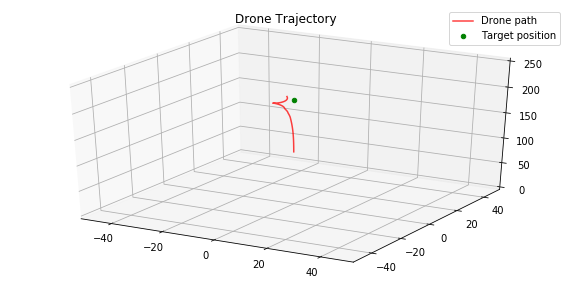

In [4]:
# Visualization
import importlib
import visualize
import imageio
from IPython.display import Image

importlib.reload(visualize)

# Utility function to show drone path in a specified episode.
def plot_drone_path(logs=logs, episode = num_episodes, target_pos = target_pos, x_lim = (-50, 50), 
                    y_lim = (-50, 50), z_lim = (0, 250), figsize=(10, 5), t_file_path=None, r_file_path=None):
    
    qd = visualize.Quadrotor(x = logs.iloc[episode-1]['x'][0], y = logs.iloc[episode-1]['y'][0], 
                             z = logs.iloc[episode-1]['z'][0], roll = logs.iloc[episode-1]['phi'][0],
                             pitch = logs.iloc[episode-1]['theta'][0], yaw = logs.iloc[episode-1]['psi'][0],
                             target_pos = target_pos, x_lim=x_lim, y_lim=y_lim, z_lim=z_lim, figsize=figsize, size=10)
    
    t_images = []
    r_images = []
    
    for t in range(len(logs.iloc[episode-1]['time'])):
        x = logs.iloc[episode-1]['x'][t]
        y = logs.iloc[episode-1]['y'][t]
        z = logs.iloc[episode-1]['z'][t]
        roll = logs.iloc[episode-1]['phi'][t]
        pitch = logs.iloc[episode-1]['theta'][t]
        yaw = logs.iloc[episode-1]['psi'][t]
        reward = logs.iloc[episode-1]['rewards'][t]
        time = logs.iloc[episode-1]['time'][t]
        
        t_image, r_image = qd.update_pose(x=x, y=y, z=z, roll=roll, pitch=pitch, yaw=yaw, reward=reward, time=time)
        t_images.append(t_image)
        r_images.append(r_image)

    if t_file_path is None:
        t_file_path = './drone_path.gif'
    
    if r_file_path is None:
        r_file_path = './RewardVsTime.gif'
        
    # Save animated gif
    imageio.mimsave(t_file_path, t_images, fps=5)
    imageio.mimsave(r_file_path, r_images, fps=5)
    
    # Show animated gif for live drone trajectory
    with open(t_file_path,'rb') as f:
        display(Image(data=f.read(), format='png'))

    # Show animated gif for reward versus time
    with open(r_file_path,'rb') as f:
        display(Image(data=f.read(), format='png'))
    
    fig = plt.figure(figsize=figsize)
    ax = fig.gca(projection='3d')
    x = logs.iloc[episode-1]['x']
    y = logs.iloc[episode-1]['y']
    z = logs.iloc[episode-1]['z']
    ax.plot3D(x, y, z, label='Drone path', alpha = 0.75, color = 'red')
    ax.set_xlim(x_lim)
    ax.set_ylim(y_lim)
    ax.set_zlim(z_lim)
    ax.scatter(target_pos[0], target_pos[1], target_pos[2], label='Target position', color = 'green')
    ax.set_title("Drone Trajectory")
    ax.legend()
    
# Plotting the drone path and reward for the max score episode.
plot_drone_path(episode = max_score_episode)

## Reflections

**Question 1**: Describe the task that you specified in `task.py`.  How did you design the reward function?

**Answer**: 
    I specified the task to be a takeoff mission, that is the task would be to reach some defined height from an initial position (point from where the drone starts its journey). Mission : (x, y, h) -> (x, y, H); h-> Initial Height; H -> Target Height. 

The reward function that I defined takes into account many different scores to compute the reward value, these are:
* Score 1: This is the absolute distance from the current drone position to the target position. I have scaled this distance between 0 and 1 by dividing the traveled distance (at any point in the journey) by total journey distance. That is, x = (total_distance-remaining_distance)/total_distance and 0<=x<=1. x = 0 means that the drone is at its initial position and x = 1 means that the drone is at its target position. This 'x' is named as nearness in my code. and at any time step if x < 0.8, then the agent receives x reward; otherwise if x > 0.8 (Means that the drone has completed 80% of the journey in the correct path), then the agent receives the 10*x reward.


* Score 2: This is the magnitude of the orientation vector (Euler angles: psi, theta, phi) of the drone. I am penalizing the drone for any angular deviation in any of the three directions. This ensures that the drone is stable and flies only upward, without tilting or rotating in any direction. So, score = -0.1*Vector_Magnitude.


* Score 3: This is the penalty for the drone if it moves out of the given environment boundaries. High penalty for the termination of the episode before specified episode runtime.


* Score 4: This is the penalty for the drone if it moves along the x-axis.


* Score 5: This is the penalty for the drone if it moves along the y-axis.


* Score 6: I think this is a very critical reward. It penalizes the drone for staying on the ground (z = 0), Most of the times during training and experimenting with various reward functions, I have noticed that the drone doesn't learn to take off for many episodes! It just stays on the ground, even if I train it for 1k episodes, this is because, at z=0, the reward function has its local maximum and the agent gets stuck in it. To avoid this there is a penalty for every time step in which the drone stays on the ground.


* Score 7: This is also a critical reward, It highly penalizes the drone for hovering off when it reaches its target height. It ensures that the drone stays in the proximity of its target height. Without this score, I have noticed that the drone first flies very stably towards the target height, and after reaching close to it, the drone just goes hovering off randomly and forms an unstable trajectory.

The final reward is calculated by summing up all these scores and then scaling it by using tanh function which gives a very nice non-linear reward range. 

**Question 2**: Discuss your agent briefly, using the following questions as a guide:

- What learning algorithm(s) did you try? What worked best for you?
- What was your final choice of hyperparameters (such as $\alpha$, $\gamma$, $\epsilon$, etc.)?
- What neural network architecture did you use (if any)? Specify layers, sizes, activation functions, etc.

**Answer**:
* I only tried one algorithm, that was suggested in the project: DDPG algorithm (Deep Deterministic Policy Gradient). I read the suggested research paper and found out that this is a very robust actor-critic method, and will work very good in continuous action space environments.


* The final choice was as follows:
    
        Update parameters->
            gamma = 0.99
            tau = 0.02
        
        Replay buffer parameters->
            buffer size = 100000
            batch size = 64
    
        Noise parameters->
            mu = 0.05
            theta = 0.05
            sigma = 0.05
    

* I used the suggested neural network architecture, I just changed the size and types of the hidden layers.

    For the actor:
    
        Dense(size=256, l2_regularizer(0.001))
        Batch normalization layer
        Relu activation layer
        Dense(size=128, l2_regularizer(0.001))
        Batch Normalization layer
        Relu activation layer
    
    For the critic:
    
        state pathway->
            Dense(size=256, l2_regularizer(0.001))
            Batch noarmalization layer
            Relu activation layer
            Dense(size=256, l2_regularizer(0.001))
    
        action pathway->
            Dense(size=256, l2_regularizer(0.001))
            Batch noarmalization layer
            Relu activation layer
    
    
I used batch normalization and L2 regularization to optimize the network.
    
    

**Question 3**: Using the episode rewards plot, discuss how the agent learned over time.

- Was it an easy task to learn or hard?
- Was there a gradual learning curve, or an aha moment?
- How good was the final performance of the agent? (e.g. mean rewards over the last 10 episodes)

**Answer**:
* This was not an easy task. This required a lot of experimentation with various neural network architecture, specifying the reward function and tuning the hyperparameters. I spent a lot of days specifying the reward function, experimenting with different neural network architectures and hyperparameters. But after specifying a good reward function, the agent learned this task very easily. 


* The agent learnt the task very quickly, attained a good score in the first 50 episodes.


* The final performance of the agent is very good indeed but not perfect. It just deviates a little bit from the target during the last timesteps of the episode when it reaches very near to the target.

**Question 4**: Briefly summarize your experience working on this project. You can use the following prompts for ideas.

- What was the hardest part of the project? (e.g. getting started, plotting, specifying the task, etc.)
- Did you find anything interesting in how the quadcopter or your agent behaved?

**Answer**:
* The hardest part of the project was designing the reward function. This part took the longest time and a lot of failures. There were many things to keep in mind while designing the reward function, not to make it too complex and not to make it too simple. A good reward function means stable gradients. Most of the time the gradients vanish during training and the agent was stuck in a local maximum, other times the gradient was not stable so the agent was acting very weirdly. So optimizing the reward function was perhaps the most difficult part.


* Yes, the most interesting thing about the agent behavior is related to the reward function. In the starting, when I designed the reward function, the agent was not learning, this is because the reward function was not scaled and the reward values were very large. But when I scaled the values, I found that the agent learned to be very good at the task in just 50 episodes. The score reached very good value in very less training. Therefore, scaling the reward to small values makes the weights optimization process very fast, due to stable values of the gradient.